# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

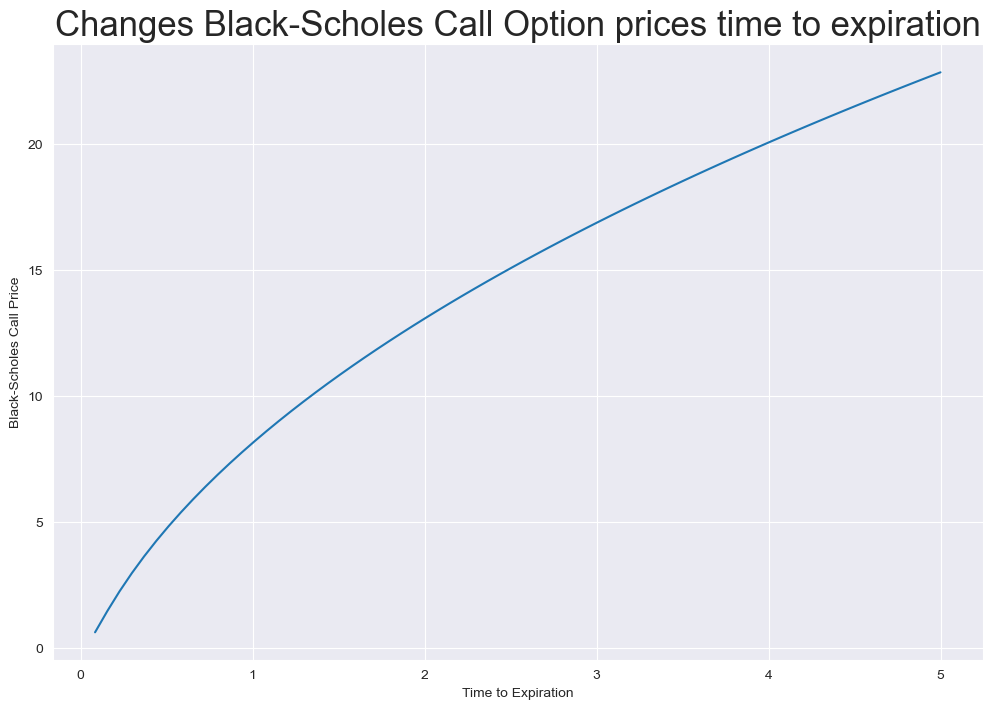

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

## Visualize Call Option Price Sensitivity to Time

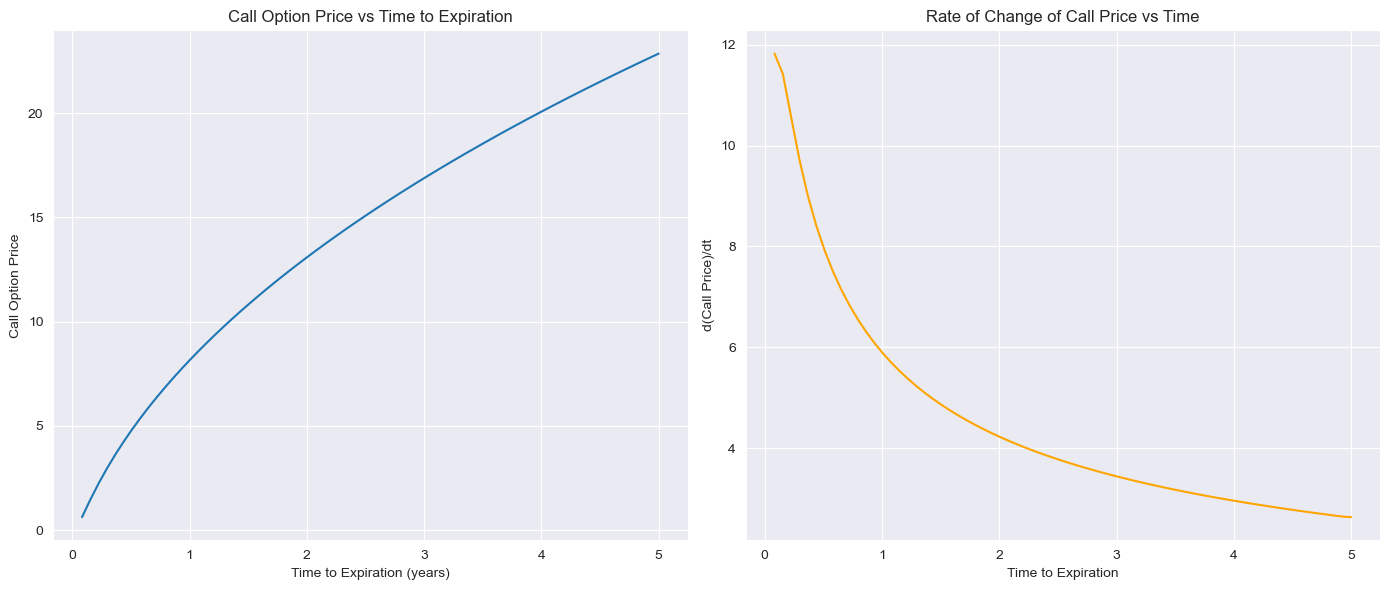

In [ ]:

call_prices = [bs_call(S0, K, sigma, t) for t in times]
call_price_derivative = np.gradient(call_prices, times)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(times, call_prices, label='Call Price')
plt.title('Call Option Price vs Time to Expiration')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('Call Option Price')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(times, call_price_derivative, label='dPrice/dt', color='orange')
plt.title('Rate of Change of Call Price vs Time')
plt.xlabel('Time to Expiration')
plt.ylabel('d(Call Price)/dt')
plt.grid(True)

plt.tight_layout()
plt.show()

## Call Option Sensitivity to Spot Price

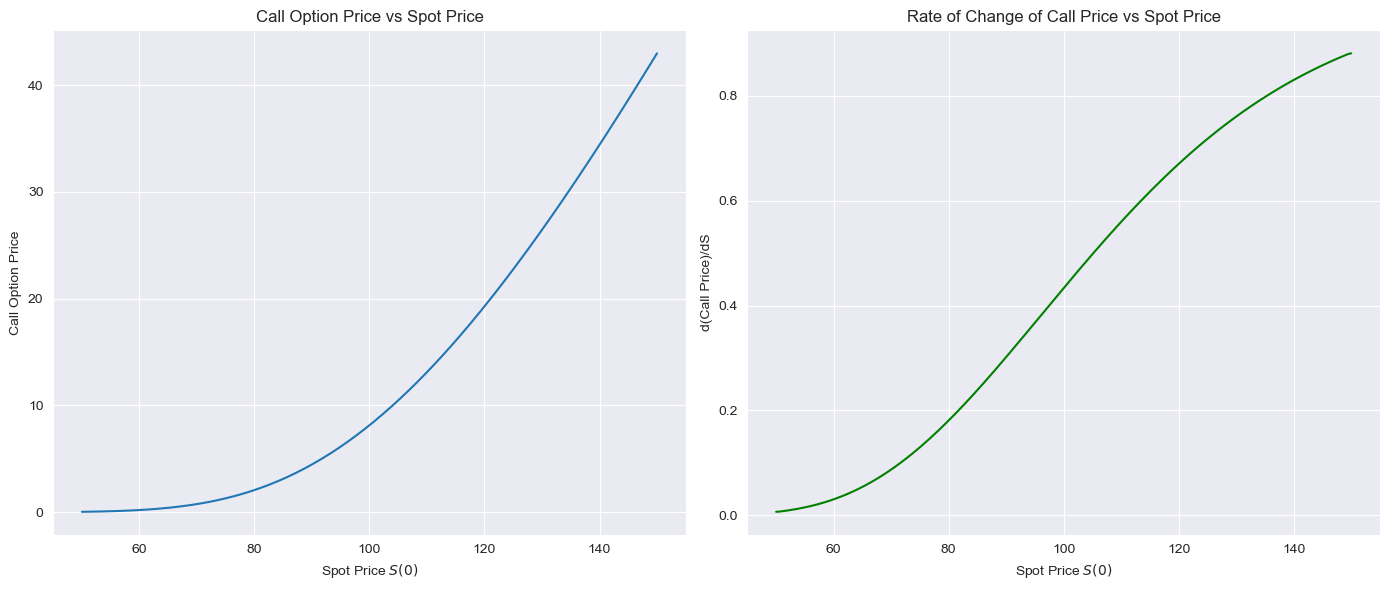

In [3]:
spot_prices = np.linspace(50, 150, 200)
call_prices_spot = [bs_call(S, K, sigma, t=1) for S in spot_prices]
call_delta = np.gradient(call_prices_spot, spot_prices)  # Approximate derivative

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(spot_prices, call_prices_spot)
plt.title('Call Option Price vs Spot Price')
plt.xlabel('Spot Price $S(0)$')
plt.ylabel('Call Option Price')

plt.subplot(1, 2, 2)
plt.plot(spot_prices, call_delta, color='green')
plt.title('Rate of Change of Call Price vs Spot Price')
plt.xlabel('Spot Price $S(0)$')
plt.ylabel('d(Call Price)/dS')

plt.tight_layout()
plt.show()

## Repeat for Put Options

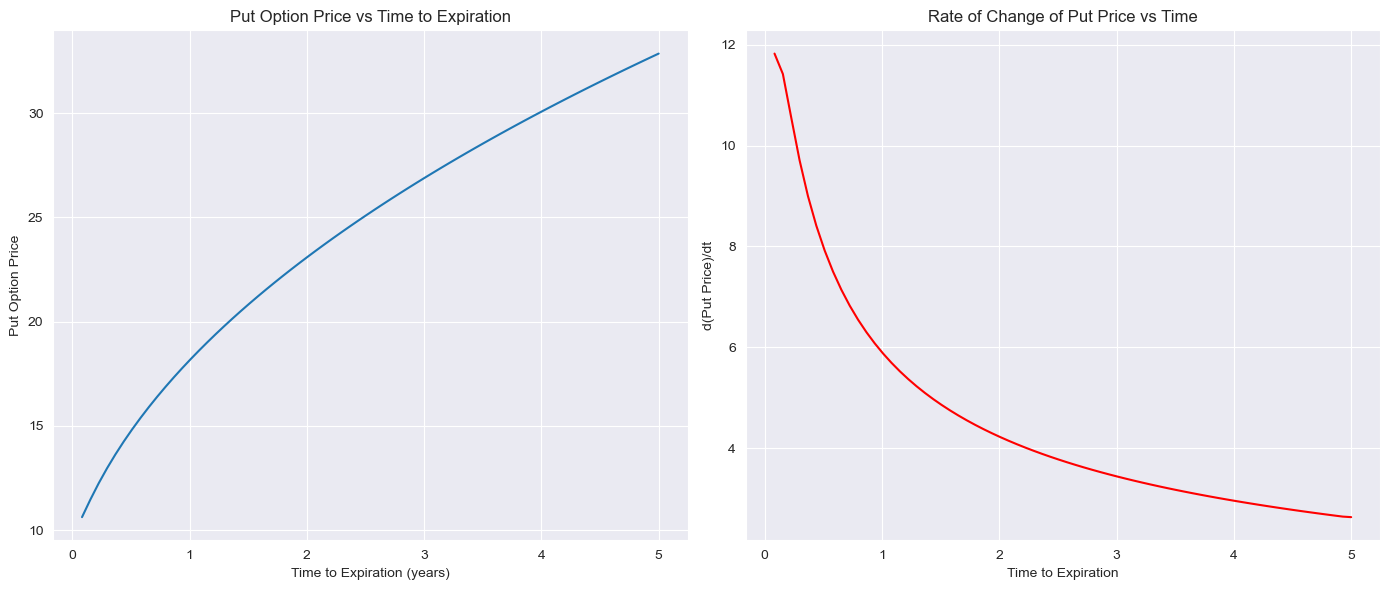

In [4]:
put_prices = [bs_put(S0, K, sigma, t) for t in times]
put_price_derivative = np.gradient(put_prices, times)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(times, put_prices, label='Put Price')
plt.title('Put Option Price vs Time to Expiration')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('Put Option Price')

plt.subplot(1, 2, 2)
plt.plot(times, put_price_derivative, label='dPrice/dt', color='red')
plt.title('Rate of Change of Put Price vs Time')
plt.xlabel('Time to Expiration')
plt.ylabel('d(Put Price)/dt')

plt.tight_layout()
plt.show()

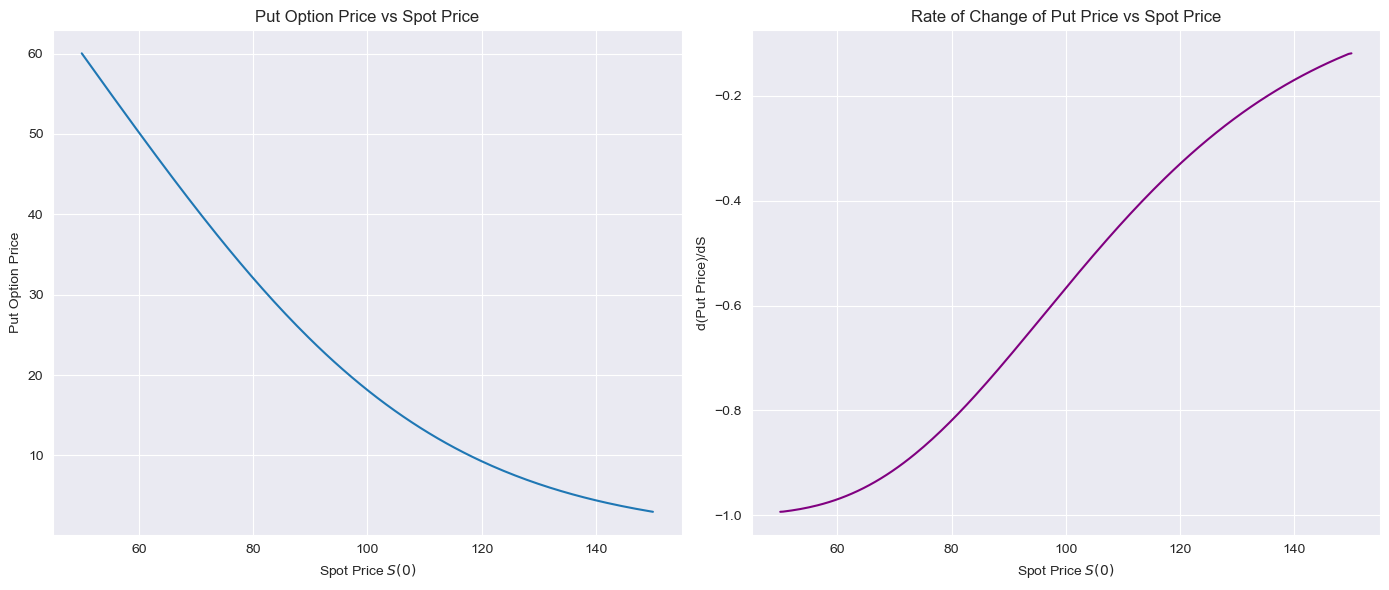

In [5]:
put_prices_spot = [bs_put(S, K, sigma, t=1) for S in spot_prices]
put_delta = np.gradient(put_prices_spot, spot_prices)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(spot_prices, put_prices_spot)
plt.title('Put Option Price vs Spot Price')
plt.xlabel('Spot Price $S(0)$')
plt.ylabel('Put Option Price')

plt.subplot(1, 2, 2)
plt.plot(spot_prices, put_delta, color='purple')
plt.title('Rate of Change of Put Price vs Spot Price')
plt.xlabel('Spot Price $S(0)$')
plt.ylabel('d(Put Price)/dS')

plt.tight_layout()
plt.show()

### Observations:

- **Call Option – Time Sensitivity:**  
  Call prices decrease as time to expiration decreases. The rate of change increases sharply closer to expiry.

- **Call Option – Spot Price Sensitivity:**  
  Call prices increase with spot price. Delta is higher when the option is near-the-money (S ≈ K).

- **Put Option – Time Sensitivity:**  
  Put prices also decrease over time. Rate of decline steepens near expiration.

- **Put Option – Spot Price Sensitivity:**  
  Put prices increase as spot price drops. Delta becomes steeper near-the-money and deep in-the-money.

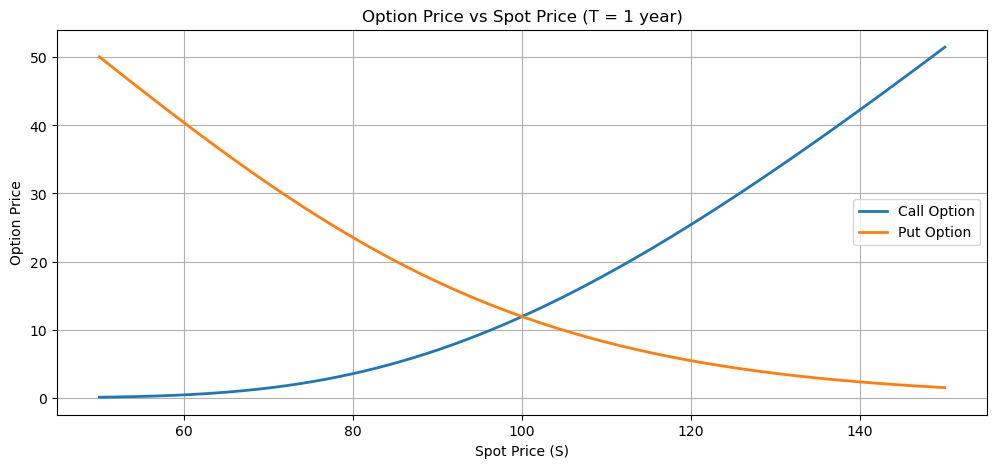

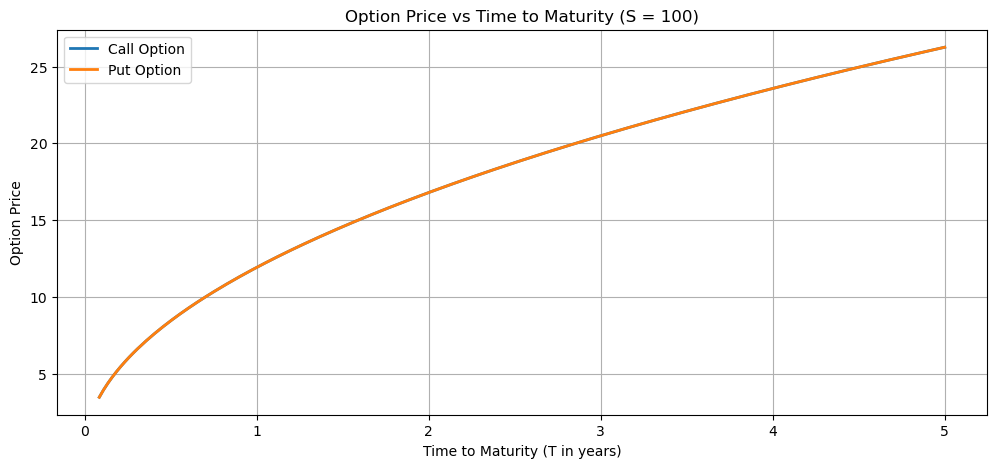

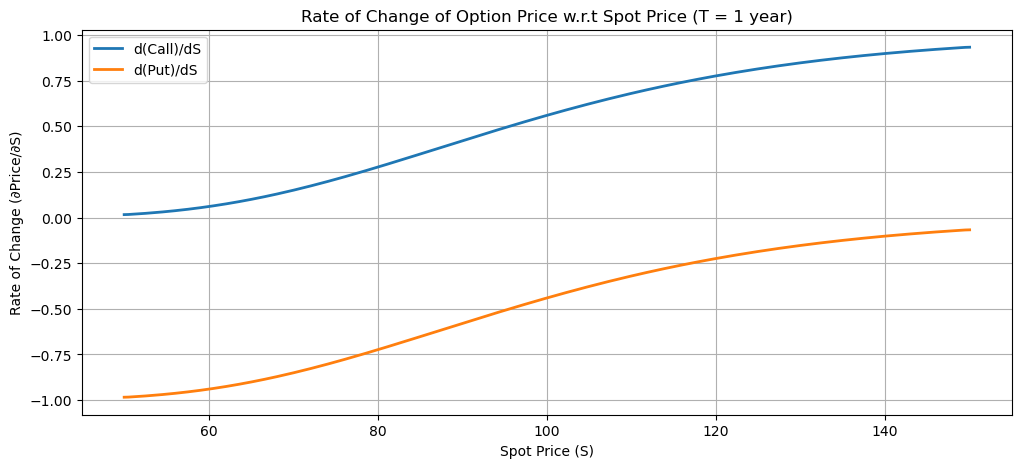

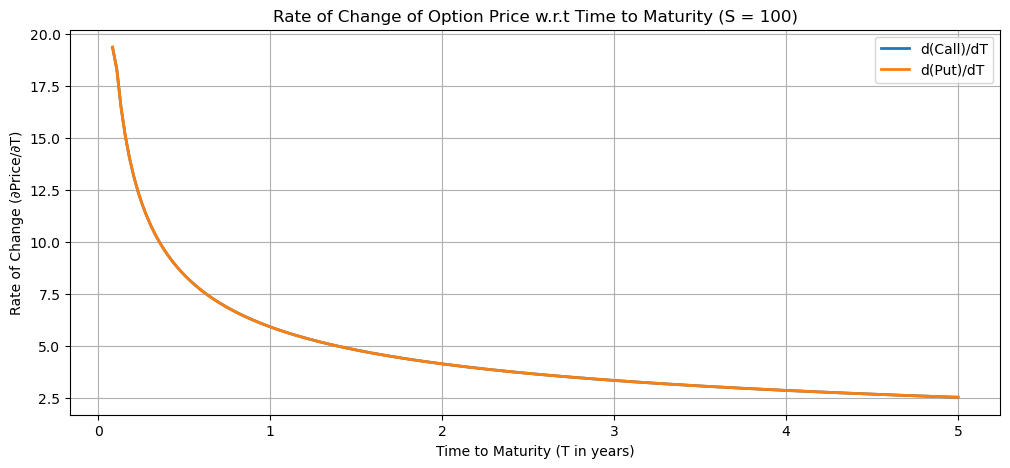

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black-Scholes Call and Put Pricing ---
def bs_call_price(S, K, sigma, T, r=0.0):
    if T <= 0 or sigma <= 0:
        return max(S - K, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def bs_put_price(S, K, sigma, T, r=0.0):
    if T <= 0 or sigma <= 0:
        return max(K - S, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# --- Parameters ---
K = 100      # Strike price
sigma = 0.3  # Volatility
r = 0.00     # Risk-free rate

# --- Plot 1: Price vs Spot Price (T = 1 year) ---
S_vals = np.linspace(50, 150, 200)
T_fixed = 1
call_Tfixed = [bs_call_price(S, K, sigma, T_fixed, r) for S in S_vals]
put_Tfixed = [bs_put_price(S, K, sigma, T_fixed, r) for S in S_vals]

plt.figure(figsize=(12, 5))
plt.plot(S_vals, call_Tfixed, label="Call Option", lw=2)
plt.plot(S_vals, put_Tfixed, label="Put Option", lw=2)
plt.title("Option Price vs Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Price vs Time to Maturity (S = 100) ---
T_vals = np.linspace(1/12, 5, 200)
S_fixed = 100
call_Sfixed = [bs_call_price(S_fixed, K, sigma, T, r) for T in T_vals]
put_Sfixed = [bs_put_price(S_fixed, K, sigma, T, r) for T in T_vals]

plt.figure(figsize=(12, 5))
plt.plot(T_vals, call_Sfixed, label="Call Option", lw=2)
plt.plot(T_vals, put_Sfixed, label="Put Option", lw=2)
plt.title("Option Price vs Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# --- First Derivatives: Numerical Gradients ---

# w.r.t. spot price
dCall_dS = np.gradient(call_Tfixed, S_vals)
dPut_dS = np.gradient(put_Tfixed, S_vals)

# w.r.t. time to maturity
dCall_dT = np.gradient(call_Sfixed, T_vals)
dPut_dT = np.gradient(put_Sfixed, T_vals)


# --- Plot 1: Derivative w.r.t Spot Price ---
plt.figure(figsize=(12, 5))
plt.plot(S_vals, dCall_dS, label="d(Call)/dS", lw=2)
plt.plot(S_vals, dPut_dS, label="d(Put)/dS", lw=2)
plt.title("Rate of Change of Option Price w.r.t Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rate of Change (∂Price/∂S)")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Derivative w.r.t Time to Maturity ---
plt.figure(figsize=(12, 5))
plt.plot(T_vals, dCall_dT, label="d(Call)/dT", lw=2)
plt.plot(T_vals, dPut_dT, label="d(Put)/dT", lw=2)
plt.title("Rate of Change of Option Price w.r.t Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Rate of Change (∂Price/∂T)")
plt.legend()
plt.grid(True)
plt.show()

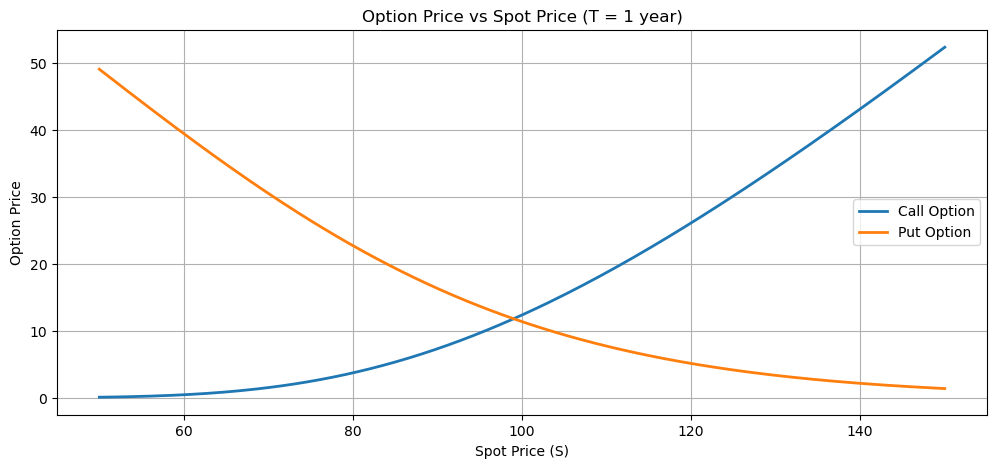

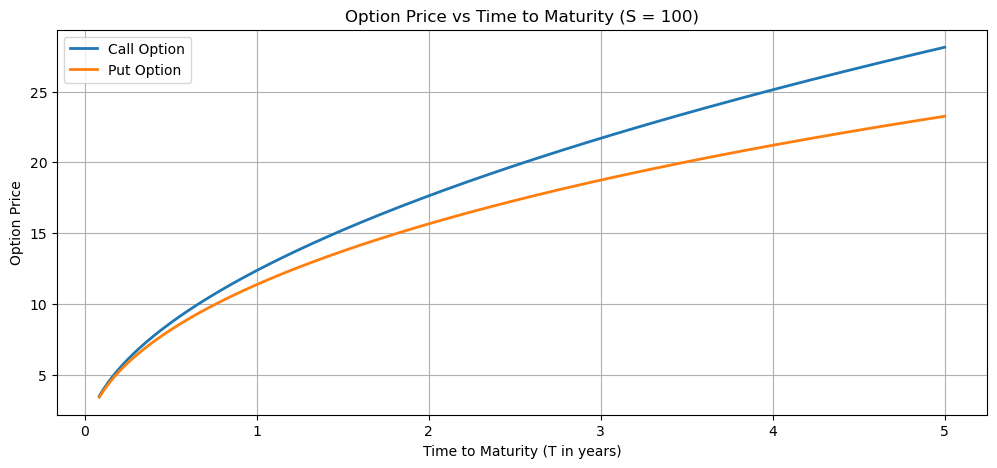

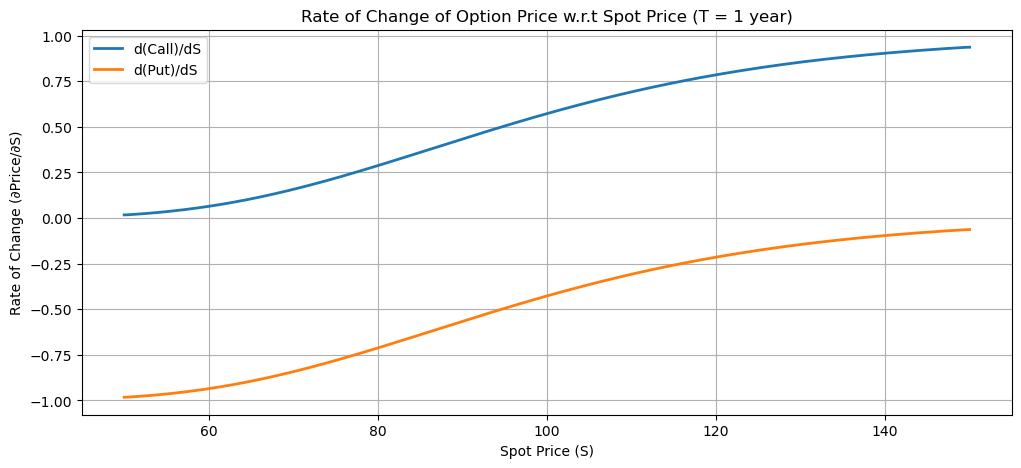

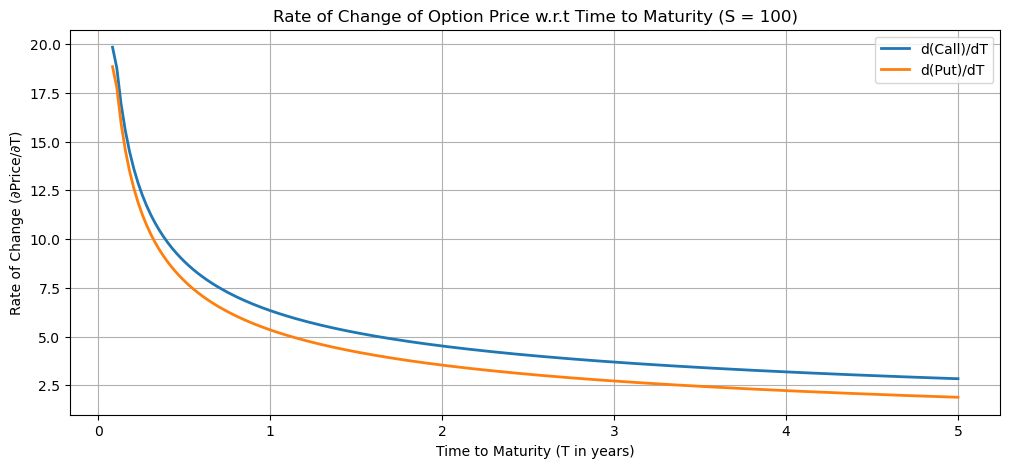

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Black-Scholes Call and Put Pricing ---
def bs_call_price(S, K, sigma, T, r=0.0):
    if T <= 0 or sigma <= 0:
        return max(S - K, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def bs_put_price(S, K, sigma, T, r=0.0):
    if T <= 0 or sigma <= 0:
        return max(K - S, 0)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# --- Parameters ---
K = 100      # Strike price
sigma = 0.3  # Volatility
r = 0.01     # Risk-free rate

# --- Plot 1: Price vs Spot Price (T = 1 year) ---
S_vals = np.linspace(50, 150, 200)
T_fixed = 1
call_Tfixed = [bs_call_price(S, K, sigma, T_fixed, r) for S in S_vals]
put_Tfixed = [bs_put_price(S, K, sigma, T_fixed, r) for S in S_vals]

plt.figure(figsize=(12, 5))
plt.plot(S_vals, call_Tfixed, label="Call Option", lw=2)
plt.plot(S_vals, put_Tfixed, label="Put Option", lw=2)
plt.title("Option Price vs Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Price vs Time to Maturity (S = 100) ---
T_vals = np.linspace(1/12, 5, 200)
S_fixed = 100
call_Sfixed = [bs_call_price(S_fixed, K, sigma, T, r) for T in T_vals]
put_Sfixed = [bs_put_price(S_fixed, K, sigma, T, r) for T in T_vals]

plt.figure(figsize=(12, 5))
plt.plot(T_vals, call_Sfixed, label="Call Option", lw=2)
plt.plot(T_vals, put_Sfixed, label="Put Option", lw=2)
plt.title("Option Price vs Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

# --- First Derivatives: Numerical Gradients ---

# w.r.t. spot price
dCall_dS = np.gradient(call_Tfixed, S_vals)
dPut_dS = np.gradient(put_Tfixed, S_vals)

# w.r.t. time to maturity
dCall_dT = np.gradient(call_Sfixed, T_vals)
dPut_dT = np.gradient(put_Sfixed, T_vals)


# --- Plot 1: Derivative w.r.t Spot Price ---
plt.figure(figsize=(12, 5))
plt.plot(S_vals, dCall_dS, label="d(Call)/dS", lw=2)
plt.plot(S_vals, dPut_dS, label="d(Put)/dS", lw=2)
plt.title("Rate of Change of Option Price w.r.t Spot Price (T = 1 year)")
plt.xlabel("Spot Price (S)")
plt.ylabel("Rate of Change (∂Price/∂S)")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Derivative w.r.t Time to Maturity ---
plt.figure(figsize=(12, 5))
plt.plot(T_vals, dCall_dT, label="d(Call)/dT", lw=2)
plt.plot(T_vals, dPut_dT, label="d(Put)/dT", lw=2)
plt.title("Rate of Change of Option Price w.r.t Time to Maturity (S = 100)")
plt.xlabel("Time to Maturity (T in years)")
plt.ylabel("Rate of Change (∂Price/∂T)")
plt.legend()
plt.grid(True)
plt.show()